# Домашняя работа №3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [3]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [4]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

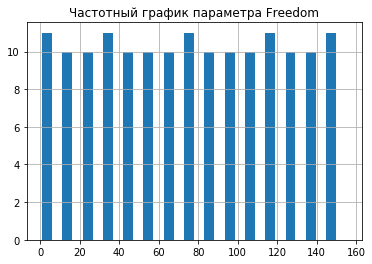

Распределение похоже на равномерное.


In [19]:
df.Freedom.hist(bins=15, width=5)
plt.title('Частотный график параметра Freedom')
plt.show()
print('Распределение похоже на равномерное.')


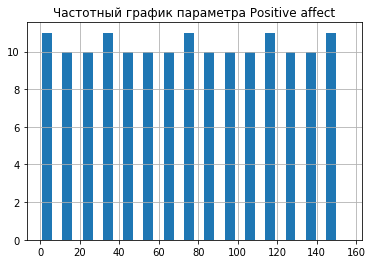

Распределение похоже на равномерное.


In [20]:
df['Positive affect'].hist(bins=15, width=5)
plt.title('Частотный график параметра Positive affect')
plt.show()
print('Распределение похоже на равномерное.')

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

Почему нельзя найти моду?

In [31]:
df.Freedom.describe()[1:8]

mean     78.000000
std      44.888751
min       1.000000
25%      39.500000
50%      78.000000
75%     116.500000
max     155.000000
Name: Freedom, dtype: float64

In [38]:
mean, std, min_, Q1, median, Q3, max_ =  df.Freedom.describe()[1:8]
IQR = Q3 - Q1
deviation = std**2
Range = max_ - min_

def hasoutliers(series):
    mean, std, min_, Q1, median, Q3, max_ =  series.describe()[1:8]
    IQR = Q3 - Q1
    outliers = series[((series - Q3)>1.5*IQR)|((Q1 - series)>1.5*IQR)]
    if outliers.empty:
        return "Выбросов нет"
    return outliers

In [41]:
print(f"""Колонка Freedom.
Моды нет, так как все элементы встречаются по одному разу.
Медиана: {median}
Мат.ожидание: {mean}
Стандартное отклонение: {std}
Дисперсия: {deviation}
Минимум: {min_}
Максимум: {max_}
Размах: {Range}
Выбросы: {hasoutliers(df.Freedom)}""")

Колонка Freedom.
Моды нет, так как все элементы встречаются по одному разу.
Медиана: 78.0
Мат.ожидание: 78.0
Стандартное отклонение: 44.88875137492688
Дисперсия: 2015.0000000000002
Минимум: 1.0
Максимум: 155.0
Размах: 154.0
Выбросы: Выбросов нет


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601657


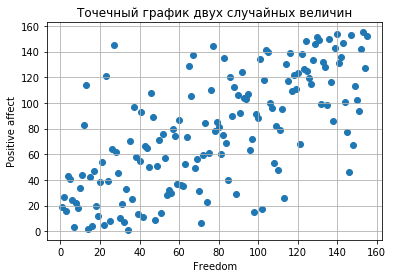

In [80]:
df = df.loc[~df['Freedom'].isnull()]
            
corr, p_value = sts.pearsonr(df['Freedom'], df['Positive affect'])

plt.scatter(df['Freedom'], df['Positive affect'])
plt.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график двух случайных величин')

print('Коэффициент корреляции Пирсона:', corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [84]:
freedom = df['Freedom']
freedom_1 = freedom - freedom.mean()

freedom_1

0     -73.0
1     -72.0
2     -75.0
3     -71.0
4     -59.0
       ... 
151   -57.0
152     0.0
153    77.0
154    55.0
155    76.0
Name: Freedom, Length: 155, dtype: float64

In [85]:
freedom_1.mean()

0.0

In [86]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

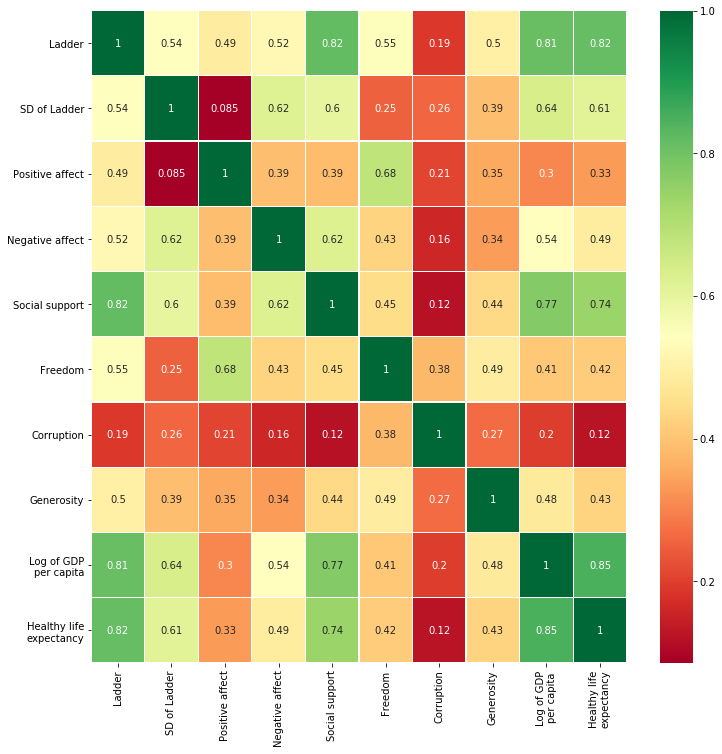

In [88]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)

Загрузить таблицу цен на авокадо: 

In [93]:
df=pd.read_csv('data/avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

Распределение похоже на нормальное.


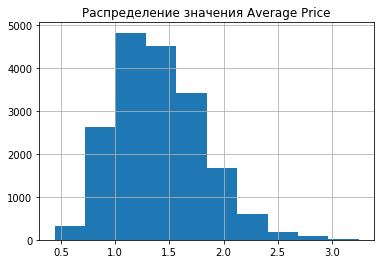

In [96]:
df.AveragePrice.hist()
plt.title('Распределение значения Average Price')
print('Распределение похоже на нормальное.')

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

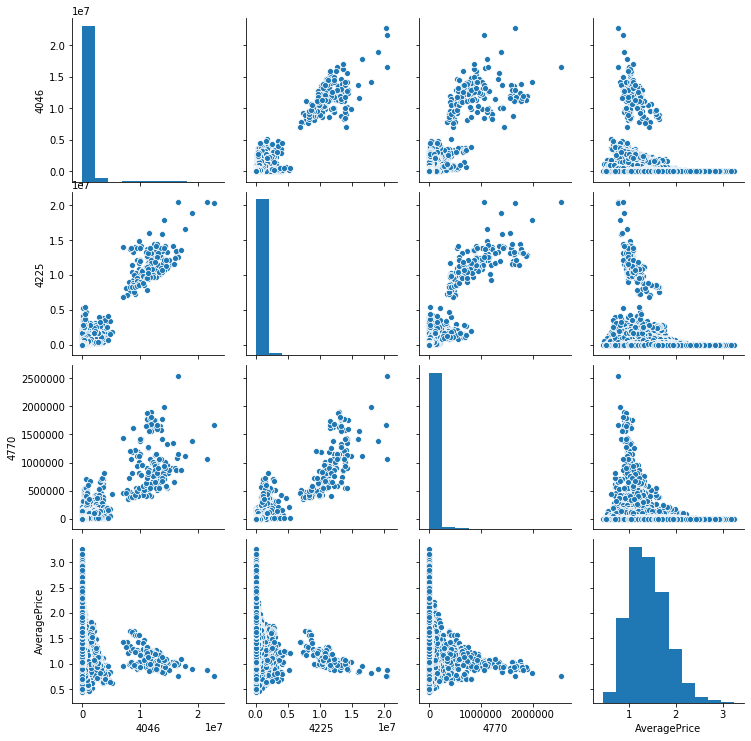

In [98]:
sns.pairplot(df[['4046', '4225', '4770', 'AveragePrice']])

Есть сильная прямая корреляция между объемом продаж разных видов авокадо. 

Между видом авокадо и средней ценой продажи за день корреляции нет.

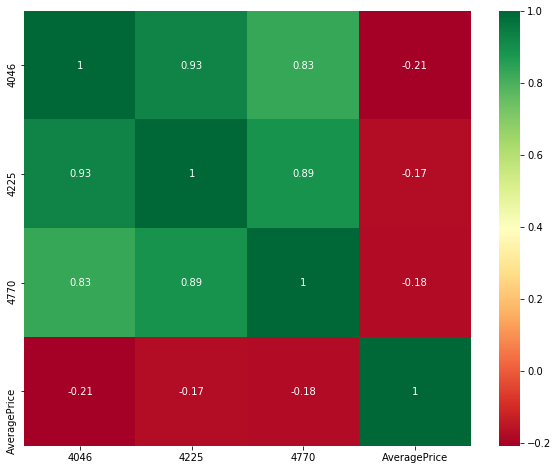

In [105]:
sns.heatmap(df[['4046', '4225', '4770', 'AveragePrice']].corr(),annot=True,cmap='RdYlGn')
plt.gcf().set_size_inches(10,8)